In [1]:
import pandas as pd

In [2]:
def avalanche_rename(df: pd.DataFrame, n_experiences) -> pd.DataFrame:

    rename_map = {}

    for x in range(n_experiences):
        rename_map[f"Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp{x:03d}"] = f"accuracy_exp_{x:03d}"

    return df.rename(columns={
        "Accuracy_On_Trained_Experiences/eval_phase/test_stream/Task000": "accuracy",
        "Unnamed: 0": "index",
        **rename_map
    })


array([[<AxesSubplot:xlabel='P(drop)', ylabel='P(drop)'>,
        <AxesSubplot:xlabel='index', ylabel='P(drop)'>,
        <AxesSubplot:xlabel='accuracy', ylabel='P(drop)'>],
       [<AxesSubplot:xlabel='P(drop)', ylabel='index'>,
        <AxesSubplot:xlabel='index', ylabel='index'>,
        <AxesSubplot:xlabel='accuracy', ylabel='index'>],
       [<AxesSubplot:xlabel='P(drop)', ylabel='accuracy'>,
        <AxesSubplot:xlabel='index', ylabel='accuracy'>,
        <AxesSubplot:xlabel='accuracy', ylabel='accuracy'>]], dtype=object)

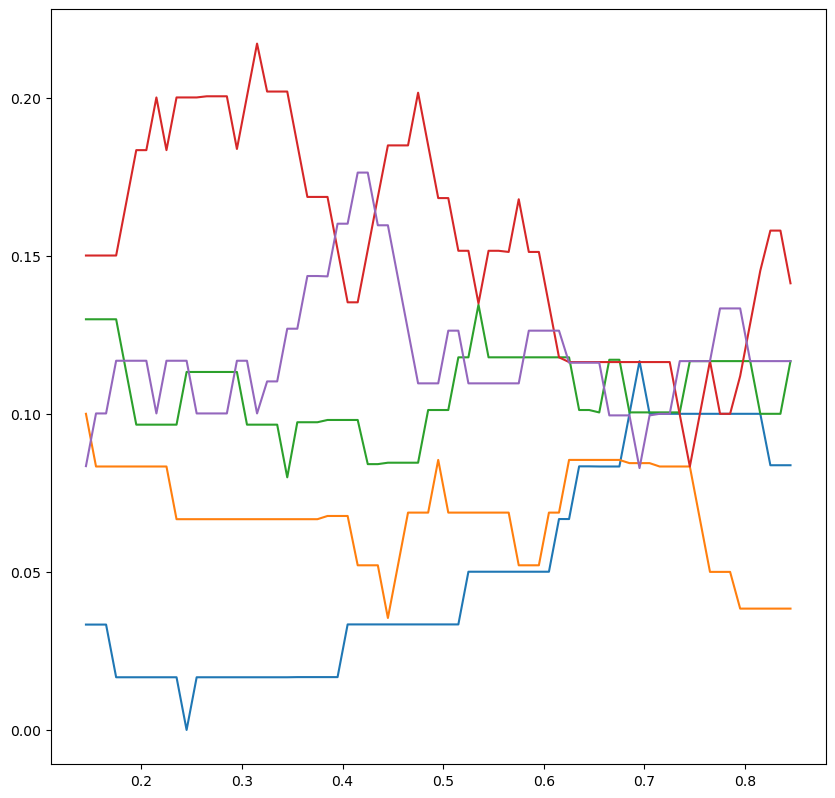

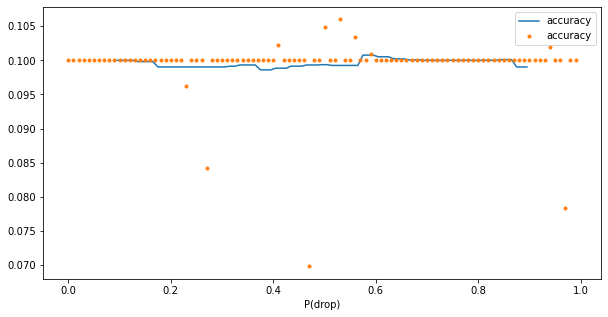

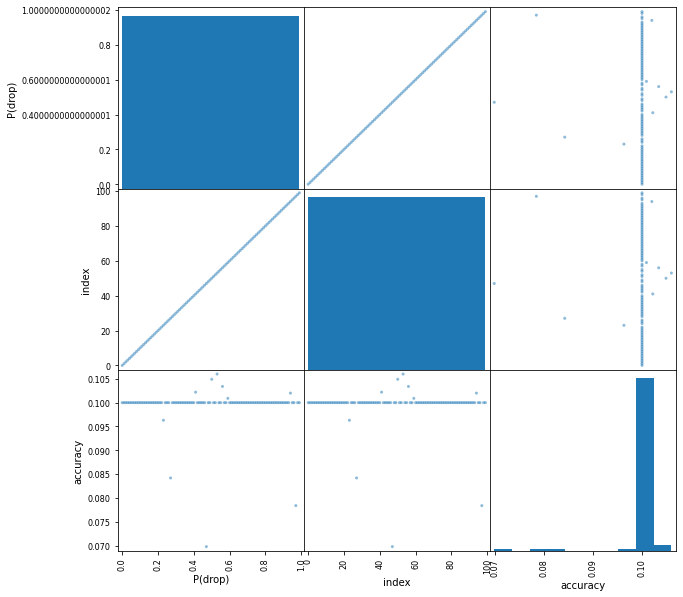

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

n_experiences = 5
# P(active) Probability it is in the active group
p_active = 1/n_experiences

df = avalanche_rename(pd.read_csv("vanilla_grid_01_12_2022_14_55_54.csv"), n_experiences)

plt.figure(figsize=(10, 10), dpi=100)



ax = plt.axes()
for exp in range(n_experiences):
    column = f"accuracy_exp_{exp:03d}"
    n = 30
    rolling = df.rolling(window=n, min_periods=n)
    mean = rolling.mean()
    y = mean[column]
    std = rolling[column].std(n-1)
    x = mean["P(drop)"]
    ax.plot(x, y)
    ax.plot(x, df[column], style=".")
    # ax.fill_between(x, y-std , y+std, alpha=0.1 )


ax = df.rolling(20).mean().plot("P(drop)", "accuracy", figsize=(10,5))
df.plot("P(drop)", "accuracy", ax=ax, style=".")

pd.plotting.scatter_matrix(
    df[["P(drop)", "index", "accuracy"]],
     figsize=(10, 10), alpha=0.5)

